In [1]:
#-*- coding:utf-8 -*-
import os
from os.path import exists, join, basename, splitext
import random
import PIL
from PIL import Image

import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

import torch
import torchvision
from torchvision import models
import torchvision.transforms as T

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

In [2]:
path = './img/3_output_bg/'
file_list = os.listdir(path)
print("{}".format(file_list))

['bg_rm_10.jpg', 'bg_rm_11.jpg', 'bg_rm_12.jpg', 'bg_rm_13.jpg', 'bg_rm_19.jpg', 'bg_rm_20.jpg', 'bg_rm_5.jpg', 'bg_rm_6.jpg', 'bg_rm_7.jpg', 'bg_rm_8.jpg', 'bg_rm_9.jpg']


In [3]:
# Download Model
model = models.detection.keypointrcnn_resnet50_fpn(pretrained=True).eval()

['bg_rm_10.jpg', 'bg_rm_11.jpg', 'bg_rm_12.jpg', 'bg_rm_13.jpg', 'bg_rm_19.jpg', 'bg_rm_20.jpg', 'bg_rm_5.jpg', 'bg_rm_6.jpg', 'bg_rm_7.jpg', 'bg_rm_8.jpg', 'bg_rm_9.jpg']
작업명 : bg_rm_10.jpg
왼쪽 어깨 굴곡 각도       : 11.16 도
왼쪽 팔꿈치 굴곡 각도     : 93.86 도
오른쪽 어깨 굴곡 각도     : 25.94 도
오른쪽 팔꿈치 굴곡 각도   : 115.41 도
목 굴곡 각도              : 0.66 도
허리 굴곡 각도            : 1.4 도
executed in 6.594s
작업명 : bg_rm_11.jpg
왼쪽 어깨 굴곡 각도       : 48.56 도
왼쪽 팔꿈치 굴곡 각도     : 163.95 도
오른쪽 어깨 굴곡 각도     : 1.84 도
오른쪽 팔꿈치 굴곡 각도   : 146.59 도
목 굴곡 각도              : 4.69 도
허리 굴곡 각도            : 0.63 도
executed in 6.371s
작업명 : bg_rm_12.jpg
왼쪽 어깨 굴곡 각도       : 3.58 도
왼쪽 팔꿈치 굴곡 각도     : 95.72 도
오른쪽 어깨 굴곡 각도     : 20.5 도
오른쪽 팔꿈치 굴곡 각도   : 107.14 도
목 굴곡 각도              : 3.23 도
허리 굴곡 각도            : 2.09 도
executed in 6.369s
작업명 : bg_rm_13.jpg
왼쪽 어깨 굴곡 각도       : 28.25 도
왼쪽 팔꿈치 굴곡 각도     : 145.51 도
오른쪽 어깨 굴곡 각도     : 8.38 도
오른쪽 팔꿈치 굴곡 각도   : 142.82 도
목 굴곡 각도              : 7.84 도
허리 굴곡 각도            : 3.15 도
executed in 6.251s
작업명 : b

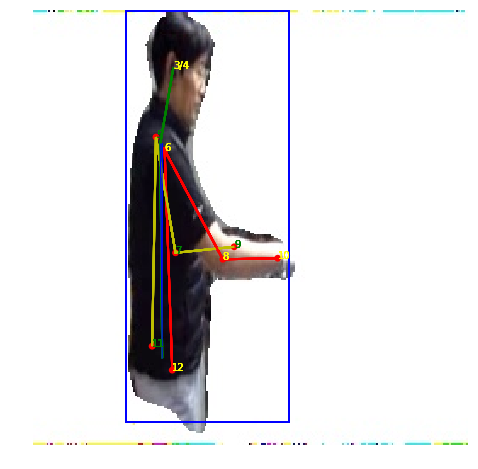

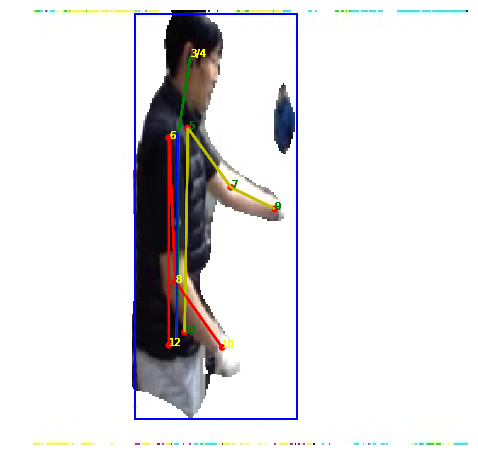

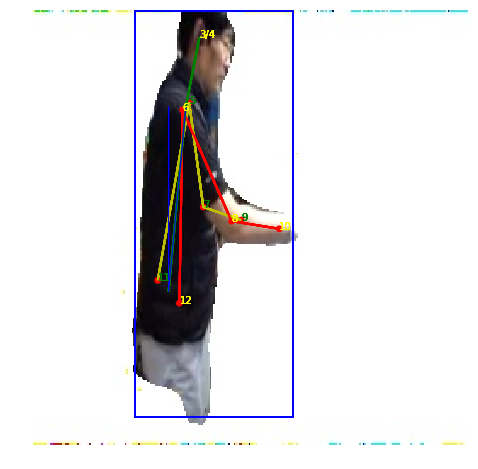

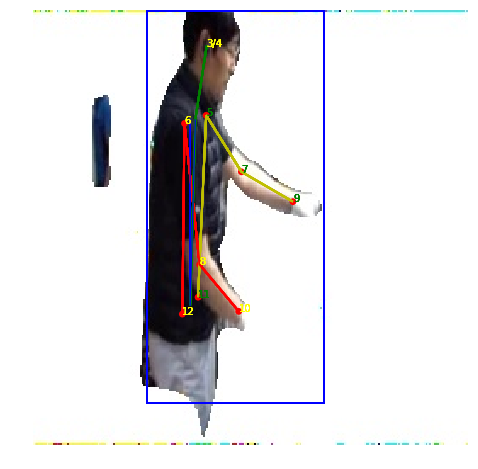

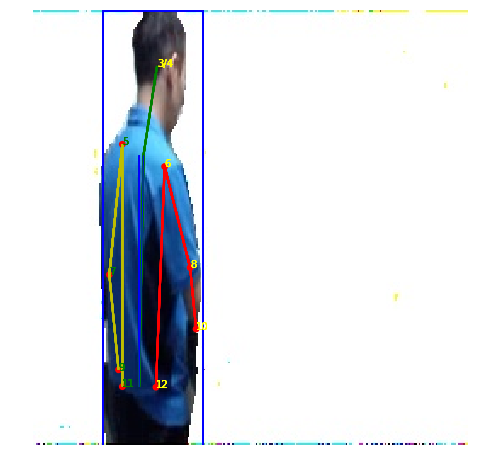

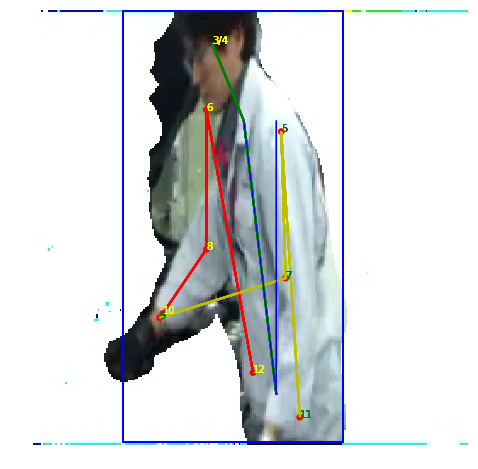

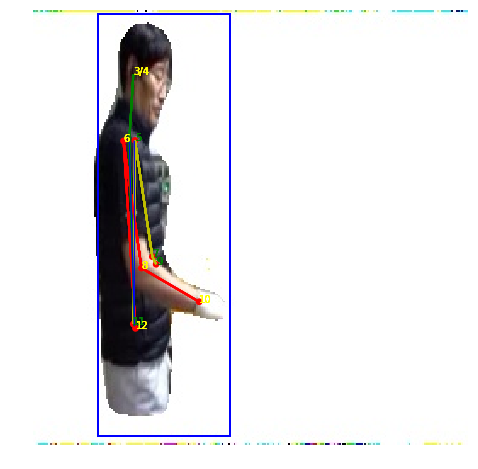

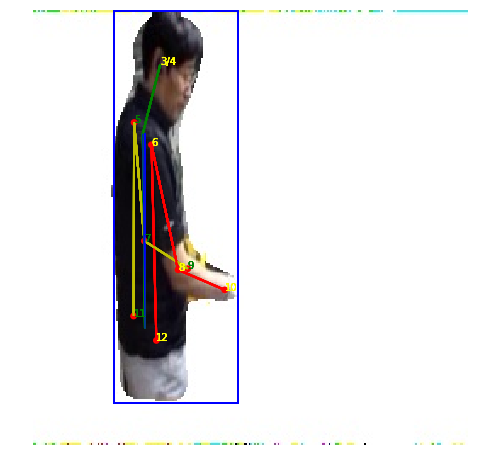

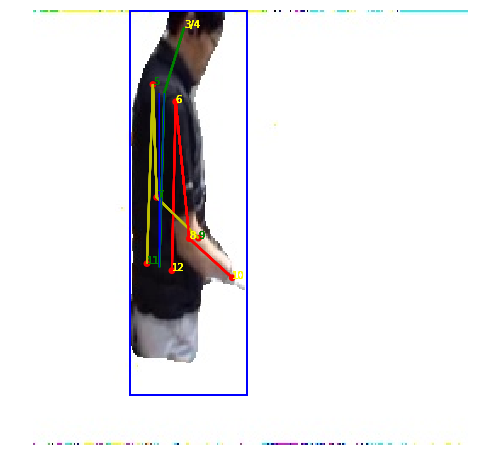

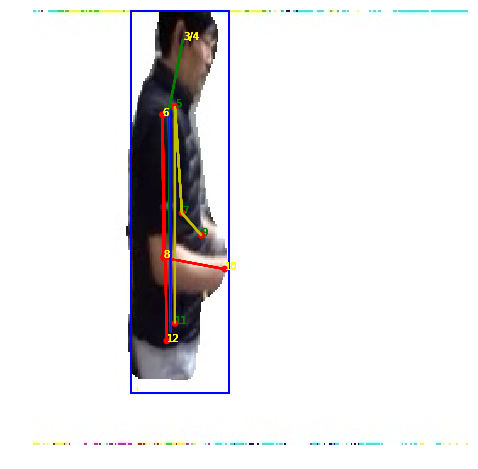

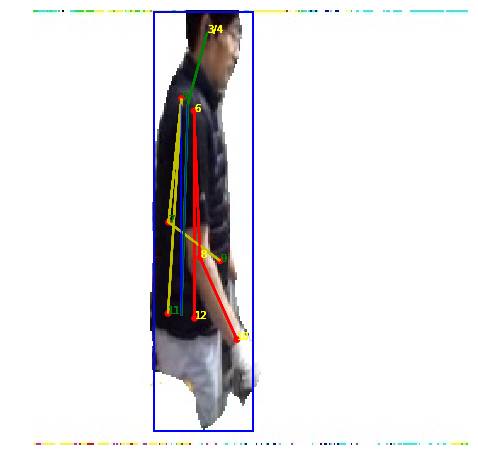

In [4]:
THRESHOLD = 0.95

path = "./img/3_output_bg/"
file_list = os.listdir(path)
print("{}".format(file_list))

for file in file_list:

    image = Image.open("./img/3_output_bg/"+file)
    
    t = time.time()
    # Image to Tensor
    trf = T.Compose([
        T.Resize(256),
        T.ToTensor() 
        ])
    input_img = trf(image) 
    out = model([input_img])[0]

    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.LINETO
    ]

    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image)

    for box, score, keypoints in zip(out['boxes'], out['scores'], out['keypoints']):
        # 스코어가 95% 이상인 것만 사용
        score = score.detach().numpy() # score(텐서)를 떼어내서 numpy배열로 바꾼다.

        if score < THRESHOLD:
            continue

        box = box.detach().numpy()
        keypoints = keypoints.detach().numpy()[:, :2] # numpy array로 변환하고 2개의 값(x, y)만 저장

        rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=2, edgecolor='b', facecolor='none')
        ax.add_patch(rect) # matplotlib에 patches를 사용하여 박스를 그려준다.

        # 17 keypoints(표시할 점의 갯수를 조절가능)
        for k in keypoints[5:13]:

            circle = patches.Circle((k[0], k[1]), radius=2, facecolor='r')
            ax.add_patch(circle)
            
            ax.text(keypoints[5][0],keypoints[5][1], '5', color='green')
            ax.text(keypoints[6][0],keypoints[6][1], '6', color='yellow')
            ax.text(keypoints[7][0],keypoints[7][1], '7', color='green')
            ax.text(keypoints[8][0],keypoints[8][1], '8', color='yellow')
            ax.text(keypoints[9][0],keypoints[9][1], '9', color='green')
            ax.text(keypoints[10][0],keypoints[10][1], '10', color='yellow')
            ax.text(keypoints[11][0],keypoints[11][1], '11', color='green')
            ax.text(keypoints[12][0],keypoints[12][1], '12', color='yellow')

            head = ((keypoints[3]+keypoints[4])/2)
            ax.text(head[0],head[1], '3/4', color='yellow')

            # Draw line
            # 왼쪽어깨굴곡(6,8,12)
            verts = [keypoints[8],keypoints[6],keypoints[12]]
            path = Path(verts, codes)
            line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='r')
            ax.add_patch(line)


            # 왼쪽팔꿈치굴곡(5,7,9)
            verts = [keypoints[5],keypoints[7],keypoints[9]]
            path = Path(verts, codes)
            line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='y')
            ax.add_patch(line)

            # 오른쪽어깨굴곡(11,5,7)
            verts = [keypoints[11],keypoints[5],keypoints[7]]
            path = Path(verts, codes)
            line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='y')
            ax.add_patch(line)

            # 오른쪽팔꿈치굴곡(6,8,10)
            verts = [keypoints[6],keypoints[8],keypoints[10]]
            path = Path(verts, codes)
            line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='r')
            ax.add_patch(line)

            # 목 굴곡
            verts = [((keypoints[3]+keypoints[4])/2),((keypoints[5]+keypoints[6])/2),((keypoints[11]+keypoints[12])/2)]
            path = Path(verts, codes)
            line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='g')
            ax.add_patch(line)

            # 허리 굴곡
            verts = [((keypoints[5]+keypoints[6])/2), ((keypoints[11]+keypoints[12])/2), (((keypoints[11]+keypoints[12])/2)[0],((keypoints[5]+keypoints[6])/2)[1])]
            path = Path(verts, codes)
            line = patches.PathPatch(path, linewidth=1, facecolor='none', edgecolor='b')
            ax.add_patch(line)
            ax.set_axis_off()
            fig.savefig('./img/4_output_kp/'+file, bbox_inches='tight')
            
    # 각도 계산
    import math
    def getAngle(a, b, c):
        ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
        return abs(ang - 360) if ang > 180 else abs(ang) #+ 360 if ang < 0 else ang

    left_sho_angle = (getAngle((keypoints[7]), (keypoints[5]), (keypoints[11])))
    right_sho_angle = (getAngle((keypoints[8]), (keypoints[6]), (keypoints[12])))
    
    left_albow_angle = (getAngle((keypoints[5]), (keypoints[7]), (keypoints[9])))
    right_albow_angle = (getAngle((keypoints[6]), (keypoints[8]), (keypoints[10])))

    
    neck_angle = getAngle(((keypoints[3]+keypoints[4])/2),((keypoints[5]+keypoints[6])/2),((keypoints[11]+keypoints[12])/2))
    if neck_angle > 90 :
        neck_angle = (180 - getAngle(((keypoints[3]+keypoints[4])/2), ((keypoints[5]+keypoints[6])/2), ((keypoints[11]+keypoints[12])/2)))/2
    elif neck_angle >= 45:
        neck_angle = neck_angle/15
    elif neck_angle < 45:
        neck_angle = neck_angle

    trunk_angle = getAngle(((keypoints[5]+keypoints[6])/2), ((keypoints[11]+keypoints[12])/2),(((keypoints[11]+keypoints[12])/2)[0],((keypoints[5]+keypoints[6])/2)[1]))/2
    print("작업명 : "+file)
    print("왼쪽 어깨 굴곡 각도       : "+str(round(left_sho_angle, 2))+" 도")
    print("왼쪽 팔꿈치 굴곡 각도     : "+str(round(left_albow_angle, 2))+" 도")
    print("오른쪽 어깨 굴곡 각도     : "+str(round(right_sho_angle, 2))+" 도")
    print("오른쪽 팔꿈치 굴곡 각도   : "+str(round(right_albow_angle, 2))+" 도")
    print("목 굴곡 각도              : "+str(round(neck_angle, 2))+" 도")
    print("허리 굴곡 각도            : "+str(round(trunk_angle, 2))+" 도")


    print('executed in %.3fs' % (time.time() - t))